# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
# Ensure the plots are displayed inline 
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# Your code here
df = pd.read_csv("data/ames.csv", index_col=0)

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

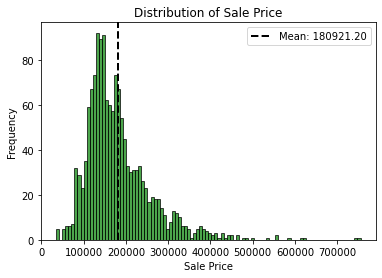

In [6]:
# Your code here
plt.hist(df['SalePrice'], bins=100, color='green', alpha=0.7, edgecolor='black')
# Calculate and plot the mean as a vertical black line
mean_saleprice = df['SalePrice'].mean()
plt.axvline(mean_saleprice, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_saleprice:.2f}')
# x label,y label and title
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.legend()
plt.show()

Now, print out the mean, median, and standard deviation:

In [7]:
# Your code here
# mean, median, and standard deviation of SalePrice
mean_saleprice = df['SalePrice'].mean()
median_saleprice = df['SalePrice'].median()
std_dev_saleprice = df['SalePrice'].std()

# Print 
print(f"Mean Sale Price: {mean_saleprice:.2f}")
print(f"Median Sale Price: {median_saleprice:.2f}")
print(f"Standard Deviation of Sale Price: {std_dev_saleprice:.2f}")


Mean Sale Price: 180921.20
Median Sale Price: 163000.00
Standard Deviation of Sale Price: 79442.50


In the cell below, interpret the above information.

In [8]:
# Replace None with appropriate text
"""
Mean Sale Price: The mean sale price of houses in the dataset is approximately 180,921.20. This represents the average price of the houses sold in Ames, IA.It serves as a central measure of the dataset.

Median Sale Price: The median sale price is 163,000.00. This is the middle value when all the sale prices are sorted in ascending order. It is less affected by extreme values and can give a better representation of the typical sale price.

Standard Deviation of Sale Price: The standard deviation of sale prices is approximately 79,442.50. This measures the dispersion of sale prices from the mean. A higher standard deviation indicates that sale prices vary more widely from the mean, while a lower standard deviation suggests that sale prices are more clustered around the mean.

In summary, the data suggests that there is some variation in sale prices, with a relatively high standard deviation as compared to the mean and median. This means that while the average sale price is around 180,921.20, individual sale prices can vary considerably from this average.
"""



'\nMean Sale Price: The mean sale price of houses in the dataset is approximately 180,921.20. This represents the average price of the houses sold in Ames, IA.It serves as a central measure of the dataset.\n\nMedian Sale Price: The median sale price is 163,000.00. This is the middle value when all the sale prices are sorted in ascending order. It is less affected by extreme values and can give a better representation of the typical sale price.\n\nStandard Deviation of Sale Price: The standard deviation of sale prices is approximately 79,442.50. This measures the dispersion of sale prices from the mean. A higher standard deviation indicates that sale prices vary more widely from the mean, while a lower standard deviation suggests that sale prices are more clustered around the mean.\n\nIn summary, the data suggests that there is some variation in sale prices, with a relatively high standard deviation as compared to the mean and median. This means that while the average sale price is arou

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

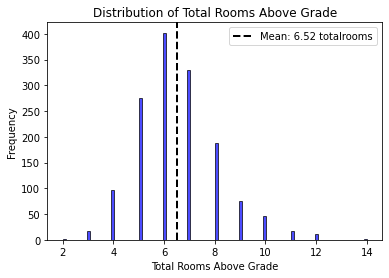

In [9]:
# Your code here
plt.hist(df['TotRmsAbvGrd'], bins=100, color='blue', alpha=0.7, edgecolor='black')

mean_totalrooms = df['TotRmsAbvGrd'].mean()
plt.axvline(mean_totalrooms, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_totalrooms:.2f} totalrooms')
# Add labels and title
plt.xlabel('Total Rooms Above Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rooms Above Grade')
plt.legend()

# Show the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [10]:
# Your code here
# mean, median, and standard deviation of TotRmsAbvGrd
mean_totalrooms = df['TotRmsAbvGrd'].mean()
median_totalrooms = df['TotRmsAbvGrd'].median()
std_dev_totalrooms = df['TotRmsAbvGrd'].std()

# Print 
print(f"Mean TotRmsAbvGrd: {mean_totalrooms:.2f}")
print(f"Median TotRmsAbvGrd: {median_totalrooms:.2f}")
print(f"Standard Deviation of TotRmsAbvGrd: {std_dev_totalrooms:.2f}")


Mean TotRmsAbvGrd: 6.52
Median TotRmsAbvGrd: 6.00
Standard Deviation of TotRmsAbvGrd: 1.63


In the cell below, interpret the above information.

In [11]:
# Replace None with appropriate text
"""
Mean TotRmsAbvGrd: The mean number of total rooms above grade is approximately 6.52 rooms. This value represents the average number of rooms in houses in the dataset.
Median TotRmsAbvGrd: The median number of total rooms above grade is 6.00 rooms.Meaning 50% of the houses have 6 or fewer rooms above grade, and 50% have 6 or more rooms above grade. The median is less sensitive to extreme values and provides a measure of the central tendency.
Standard Deviation of TotRmsAbvGrd: The standard deviation of the number of total rooms above grade is approximately 1.63. This quantifies the extent to which the number of rooms above grade varies from the mean. A higher standard deviation indicates greater variability in the number of rooms, while a lower standard deviation suggests that most houses have a similar number of rooms above grade.
Summary: The standard deviation of approximately 1.63 indicates some variability in the number of rooms, but it's relatively moderate, suggesting that many houses have a similar number of rooms above grade.
"""

"\nMean TotRmsAbvGrd: The mean number of total rooms above grade is approximately 6.52 rooms. This value represents the average number of rooms in houses in the dataset.\nMedian TotRmsAbvGrd: The median number of total rooms above grade is 6.00 rooms.Meaning 50% of the houses have 6 or fewer rooms above grade, and 50% have 6 or more rooms above grade. The median is less sensitive to extreme values and provides a measure of the central tendency.\nStandard Deviation of TotRmsAbvGrd: The standard deviation of the number of total rooms above grade is approximately 1.63. This quantifies the extent to which the number of rooms above grade varies from the mean. A higher standard deviation indicates greater variability in the number of rooms, while a lower standard deviation suggests that most houses have a similar number of rooms above grade.\nSummary: The standard deviation of approximately 1.63 indicates some variability in the number of rooms, but it's relatively moderate, suggesting that 

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

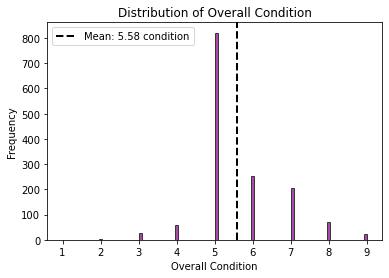

In [12]:
# Your code here
plt.hist(df['OverallCond'], bins=100, color='purple', alpha=0.7, edgecolor='black')

mean_conditions = df['OverallCond'].mean()
plt.axvline(mean_conditions, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_conditions:.2f} condition')
# Add labels and title
plt.xlabel('Overall Condition')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Condition')
plt.legend()

# Show the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [13]:
# Your code here
mean_conditions = df['OverallCond'].mean()
median_conditions = df['OverallCond'].median()
std_dev_conditions = df['OverallCond'].std()

# Print 
print(f"Mean Overall Condition: {mean_conditions:.2f}")
print(f"Median Overall Condition: {median_conditions:.2f}")
print(f"Standard Deviation of Overall Condition: {std_dev_conditions:.2f}")


Mean Overall Condition: 5.58
Median Overall Condition: 5.00
Standard Deviation of Overall Condition: 1.11


In the cell below, interpret the above information.

In [14]:
# Replace None with appropriate text
"""
Mean Overall Condition: The mean overall condition rating is 5.58. This value represents the average condition rating of houses in the dataset.This suggests that, on average, the houses tend to be in slightly better than average condition.
Median Overall Condition: The median overall condition rating is 5.00. This means that 50% of the houses have an overall condition rating of 5 or lower, and 50% have a rating of 5 or higher.
Standard Deviation of Overall Condition: The standard deviation of the overall condition ratings is 1.11. This standard deviation quantifies the extent to which the condition ratings vary from the mean.There is some variability in the condition ratings, but it's relatively moderate.
In summary, data indicates that, on average, the houses have a slightly better than average overall condition (mean of 5.58), with a median of 5.00. The standard deviation of 1.11 suggests that there is some variation in condition ratings, but it's not extreme.
"""

"\nMean Overall Condition: The mean overall condition rating is 5.58. This value represents the average condition rating of houses in the dataset.This suggests that, on average, the houses tend to be in slightly better than average condition.\nMedian Overall Condition: The median overall condition rating is 5.00. This means that 50% of the houses have an overall condition rating of 5 or lower, and 50% have a rating of 5 or higher.\nStandard Deviation of Overall Condition: The standard deviation of the overall condition ratings is 1.11. This standard deviation quantifies the extent to which the condition ratings vary from the mean.There is some variability in the condition ratings, but it's relatively moderate.\nIn summary, data indicates that, on average, the houses have a slightly better than average overall condition (mean of 5.58), with a median of 5.00. The standard deviation of 1.11 suggests that there is some variation in condition ratings, but it's not extreme.\n"

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [15]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [16]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

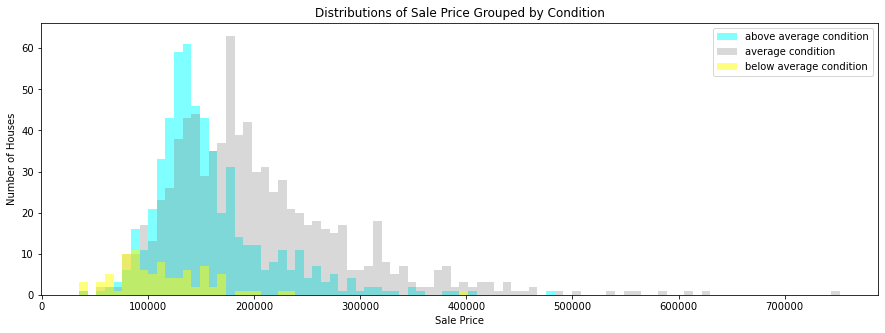

In [17]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [18]:
# Replace None with appropriate text
"""
Sale Price Distribution: All three subsets have similar shapes of sale price distributions. They all have a right-skewed distribution, which means that the majority of houses have lower sale prices, with a long tail of houses with higher sale prices.
Overlapping Ranges: The ranges of sale prices for the three categories overlap, indicating that there are houses with various conditions at different price points.Overall condition is not the sole determinant of sale price, and other factors may also play a significant role.
No Surprising Outliers: There are no particularly surprising outliers in the data that would suggest a house in exceptionally poor condition selling for an extraordinarily high price, or vice versa.

In summary, the plot shows that overall condition does have some influence on sale price, with houses in above-average condition generally commanding higher prices. However, it also highlights that sale price is influenced by a combination of factors beyond just condition, and there is significant variation in price within each condition category.
"""

'\nSale Price Distribution: All three subsets have similar shapes of sale price distributions. They all have a right-skewed distribution, which means that the majority of houses have lower sale prices, with a long tail of houses with higher sale prices.\nOverlapping Ranges: The ranges of sale prices for the three categories overlap, indicating that there are houses with various conditions at different price points.Overall condition is not the sole determinant of sale price, and other factors may also play a significant role.\nNo Surprising Outliers: There are no particularly surprising outliers in the data that would suggest a house in exceptionally poor condition selling for an extraordinarily high price, or vice versa.\n\nIn summary, the plot shows that overall condition does have some influence on sale price, with houses in above-average condition generally commanding higher prices. However, it also highlights that sale price is influenced by a combination of factors beyond just con

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [19]:
# Your code here
# Pearson correlations between SalePrice and all other numeric columns
correlations = df.corr()['SalePrice'].abs().sort_values(ascending=False)

# Remove the correlation with SalePrice itself (which is always 1.0)
correlations = correlations.drop('SalePrice')

# Get the name of the column with the highest positive correlation
most_positive_corr_column = correlations.index[0]
most_positive_corr_value = correlations[0]

print(f"Column with the highest positive correlation with SalePrice: {most_positive_corr_column}")
print(f"Pearson Correlation Value: {most_positive_corr_value:.2f}")


Column with the highest positive correlation with SalePrice: OverallQual
Pearson Correlation Value: 0.79


Now, find the ***most negatively correlated*** column:

In [20]:
# Your code here
# Pearson correlations between SalePrice and all other numeric columns
correlations = df.corr()['SalePrice'].abs().sort_values(ascending=False)

# Remove the correlation with SalePrice itself (which is always 1.0)
correlations = correlations.drop('SalePrice')

# Get the name of the column with the highest negative correlation
most_negative_corr_column = correlations.index[-1]  # Using [-1] to get the lowest value
most_negative_corr_value = correlations[-1]

print(f"Column with the highest negative correlation with SalePrice: {most_negative_corr_column}")
print(f"Pearson Correlation Value: {most_negative_corr_value:.2f}")


Column with the highest negative correlation with SalePrice: BsmtFinSF2
Pearson Correlation Value: 0.01


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

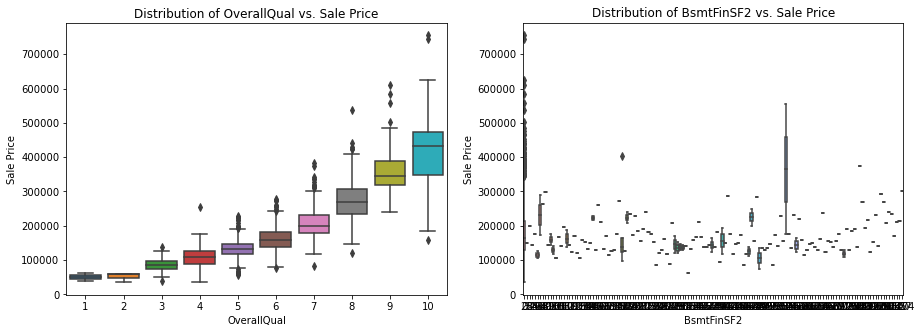

In [24]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=most_positive_corr_column,
    y=df["SalePrice"],
    data=df,
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=most_negative_corr_column,
    y=df["SalePrice"],
    data=df,
    ax=ax2
)

# Customize labels
ax1.set_title(f"Distribution of {most_positive_corr_column} vs. Sale Price")
ax1.set_xlabel(f"{most_positive_corr_column}")
ax1.set_ylabel("Sale Price")
ax2.set_title(f"Distribution of {most_negative_corr_column} vs. Sale Price")
ax2.set_xlabel(f"{most_negative_corr_column}")
ax2.set_ylabel("Sale Price");


Interpret the results below. Consult `data/data_description.txt` as needed.

In [25]:
# Replace None with appropriate text
"""
 The box plots show the relationships between the columns with the highest positive and negative correlations with Sale Price.
 These visualizations help us understand how these features relate to sale prices. For example, houses with higher overall quality tend to have higher sale prices, while houses with more kitchens above grade tend to have lower sale prices.
 However, there is still variability in sale prices within each category.
"""

'\n The box plots show the relationships between the columns with the highest positive and negative correlations with Sale Price.\n These visualizations help us understand how these features relate to sale prices. For example, houses with higher overall quality tend to have higher sale prices, while houses with more kitchens above grade tend to have lower sale prices.\n However, there is still variability in sale prices within each category.\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [26]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

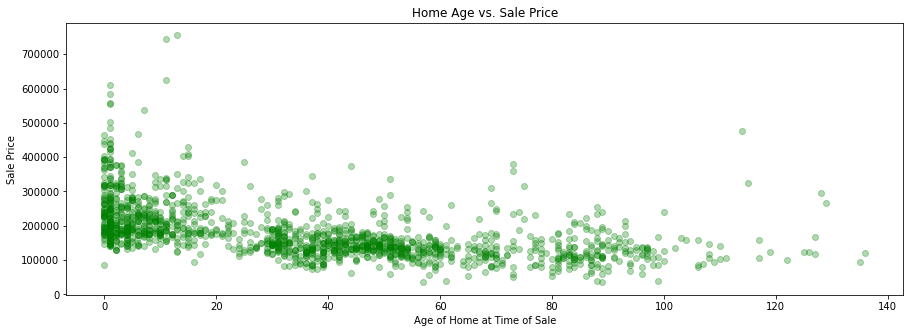

In [27]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [28]:
# Replace None with appropriate text
"""
The plot consists of scattered points, each representing a home in the dataset.There are some outliers where older homes have exceptionally high sale prices.
The plot shows that the age of a home is a significant factor in determining its sale price.
Newer homes tend to command higher prices, while older homes have more variability in sale prices, with some exceptions where older homes can still have high values.
"""

'\nThe plot consists of scattered points, each representing a home in the dataset.There are some outliers where older homes have exceptionally high sale prices.\nThe plot shows that the age of a home is a significant factor in determining its sale price.\nNewer homes tend to command higher prices, while older homes have more variability in sale prices, with some exceptions where older homes can still have high values.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.